In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
# настройки отображения графиков
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
orders = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/orders.csv')
orders.head()

,id,created_at,seller_id,product_price,quantity,status
0,12,2020-08-21 04:20:08.867,15,4417.2,1,BuyerDidNotCome
1,1,2020-08-03 10:39:52.847,2,911.5,1,BuyerDidNotCome
2,2,2020-08-03 10:48:48.763,2,911.5,2,Rejection
3,25,2020-09-05 14:16:03.177,4,435.0,2,BuyerDidNotCome
4,17,2020-08-27 06:07:22.65,10,4000.0,1,Issued


In [4]:
orders.dtypes

id                 int64
created_at        object
seller_id          int64
product_price    float64
quantity           int64
status            object
dtype: object

In [5]:
orders['created_at'] = pd.to_datetime(orders['created_at'])

In [6]:
# Количество продавцов
num_seller = orders['seller_id'].value_counts(sort=False)
len(num_seller)

31

In [7]:
registrations = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/registrations.csv')
registrations.head()

,id,inn,created_at,is_accepted,is_seller
0,5781db93a6444c921c45efcc7f30bd08,2.301126e+11,2020-07-17 10:11:40.204382,False,False
1,e8862ca7b667307568ca408c05c57cce,5.047905e+11,2020-07-31 15:54:30.906968,False,False
2,838ae3edd30e77940522cb950fb6a77d,NaN,2020-08-03 08:09:59.410891,False,True
3,d8aa22a597b538ddef927675a20fec45,NaN,2020-07-29 10:03:43.949494,False,True
4,d30bd4297f49a76595df3eb348b59eaa,NaN,2020-07-30 12:48:44.982906,False,True


In [8]:
registrations.dtypes

id              object
inn            float64
created_at      object
is_accepted       bool
is_seller         bool
dtype: object

In [9]:
registrations['created_at'] = pd.to_datetime(registrations['created_at'])

In [10]:
sellers = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/sellers.csv',
    converters={'contractor_json': json.loads},
    header=0,
    quotechar='"')
contractor = sellers.join(pd.io.json.json_normalize(
    sellers["contractor_json"])).drop(["contractor_json"], axis=1)
contractor

<ipython-input-10-84298213f91c>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  contractor = sellers.join(pd.io.json.json_normalize(


,id,created_at,Inn,Bulk,City,Flat,Ogrn,House,Оkpo,Status,Street,ZipCode,LegalName,RegionName,Settlement
0,1,2020-08-03 07:12:03.963452,5544554451,None,None,None,None,None,None,0,None,None,None,None,None
1,2,2020-08-03 07:38:31.136276,0000000000,None,None,None,None,None,None,0,None,None,None,None,None
2,3,2020-08-04 05:58:33.473403,700202974358,None,Томск,None,317703100080340,None,0114009213,1,None,None,None,Томская область,None
3,4,2020-08-06 05:05:37.043578,7017216138,None,Томск,None,1087017018395,дом 9,85256729,1,улица Киевская,634012,"Общество с ограниченной ответственностью ""Авто...",Томская область,None
4,5,2020-08-06 06:03:06.613762,352500119022,None,None,None,316290100082018,None,0104421401,1,None,None,None,Архангельская область,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,2020-11-11 05:22:52.213879,027612880004,None,Уфа,None,317028000128126,None,0119910853,1,None,None,None,Башкортостан республика,None
68,69,2020-11-11 06:32:21.733324,742600456869,None,None,None,306743828900016,None,0151106487,1,None,None,None,Челябинская область,None
69,70,2020-11-11 08:54:29.692515,745010253903,None,Челябинск,None,308745011400012,None,0160758844,1,None,None,None,Челябинская область,None
70,71,2020-11-11 11:24:19.889126,745214807998,None,Челябинск,None,318745600101871,None,0131335359,1,None,None,None,Челябинская область,None


In [11]:
orders['seller_id'].value_counts()

30    81
10    39
15    35
47    29
2     28
4     17
53    16
3     14
59    14
1      9
26     8
7      6
32     6
41     6
54     5
6      4
27     4
65     3
48     2
34     1
64     1
61     1
58     1
5      1
12     1
57     1
33     1
49     1
29     1
31     1
67     1
Name: seller_id, dtype: int64

In [12]:
orders['status'].value_counts()

Issued             155
Rejection           66
New                 41
BuyerDidNotCome     38
Canceled            38
Name: status, dtype: int64

Text(0.5, 1.0, 'Статусы заявок у продавцов')

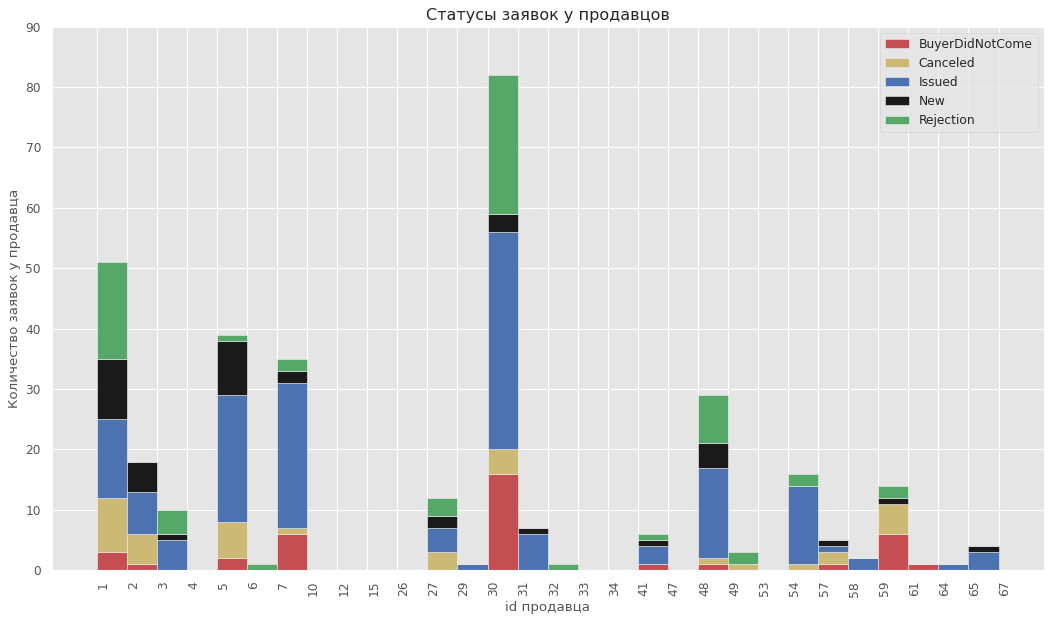

In [13]:
# Статусы заявок у продавцов

# Данные
x_var = 'seller_id'
groupby_var = 'status'
orders_agg = orders.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [orders[x_var].values.tolist() for i, orders in orders_agg]

# График
plt.figure(figsize=(16, 9), dpi=80)
n, bins, patches = plt.hist(vals,
                            30,
                            stacked=True,
                            density=False,
                            color=['r', 'y', 'b', 'k', 'g'])

# Легенда
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
plt.legend({
    group: col
    for group, col in zip(
        np.unique(orders[groupby_var]).tolist(), colors[:len(vals)])
})

plt.ylim(0, 90)
plt.xticks(ticks=bins,
           labels=np.unique(orders[x_var]).tolist(),
           rotation=90,
           horizontalalignment='left')
plt.xlabel('id продавца')
plt.ylabel('Количество заявок у продавца')
plt.title('Статусы заявок у продавцов')

Text(0.5, 1.0, 'Статусы созданных заказов')

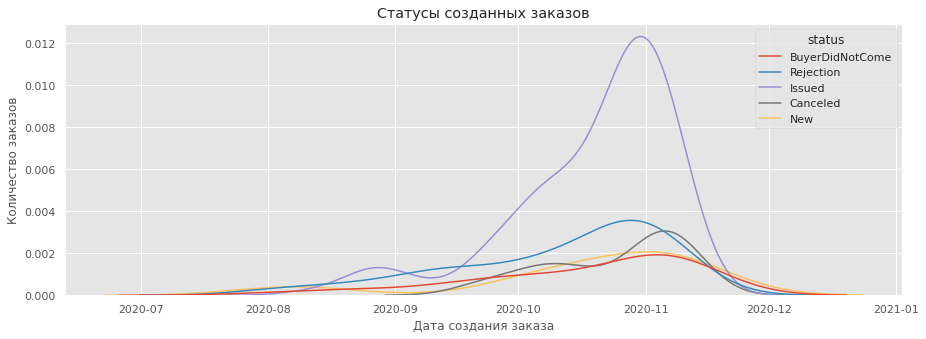

In [14]:
sns.kdeplot(data=orders, x='created_at', hue='status')
plt.xlabel('Дата создания заказа')
plt.ylabel('Количество заказов')
plt.title('Статусы созданных заказов')

In [16]:
# Достигнут критерий успешности пробного запуска >= 10 продаж на продавца
orders_issued = orders[orders['status'] == 'Issued']

sellers_id_groups = orders_issued.groupby(['seller_id'])

success_sellers=sellers_id_groups.filter(lambda group: group['status'].count() >= 10)


Text(0.5, 1.0, '>= 10 продаж на продавца')

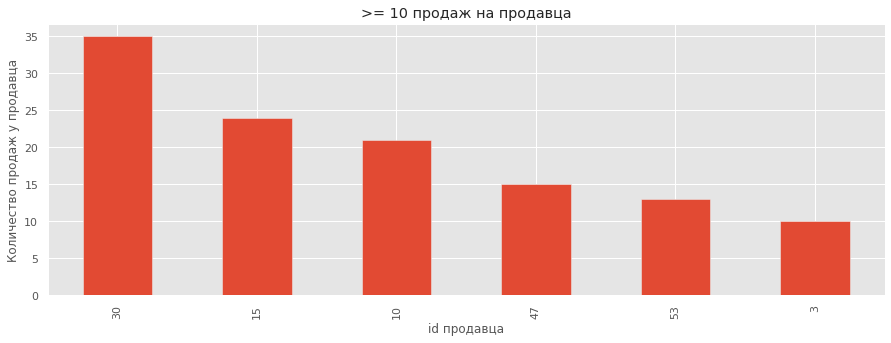

In [18]:
success_sellers['seller_id'].value_counts().plot.bar()

plt.xlabel('id продавца')
plt.ylabel('Количество продаж у продавца')
plt.title('>= 10 продаж на продавца')

In [22]:
# Процент продавцов, которым удалось достичь критерия успешности
num_success_sellers = success_sellers['seller_id'].value_counts(sort=False)
len(num_success_sellers)/ len(num_seller)* 100 

19.35483870967742